# Step 1: Install the mongomock library and Pymongo

In [ ]:
!pip install mongomock
!pip install pymongo

# Step 2: Import the required libraries and create a simulated MongoDB environment

In [20]:
import mongomock
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a simulated MongoDB client and database


In [3]:
simulated_client = mongomock.MongoClient()
simulated_db = simulated_client["mydatabase"]
simulated_collection = simulated_db["mycollection"]

# Step 3: Insert sample data into the simulated collection

In [4]:
data = [
    {"name": "Alice Johnson", "age": 25, "city": "Los Angeles"},
    {"name": "Bob Smith", "age": 32, "city": "Chicago"},
    {"name": "Emily Brown", "age": 28, "city": "San Francisco"},
    {"name": "David Wilson", "age": 40, "city": "Houston"},
    {"name": "Sophia Lee", "age": 22, "city": "New York"},
    {"name": "James Davis", "age": 35, "city": "Boston"},
    {"name": "Olivia Miller", "age": 29, "city": "Seattle"},
    {"name": "Daniel Anderson", "age": 28, "city": "Miami"},
    {"name": "Ava Martinez", "age": 27, "city": "Phoenix"},
    {"name": "Michael Taylor", "age": 31, "city": "Denver"},
    {"name": "Emma Thomas", "age": 24, "city": "Atlanta"},
    {"name": "William Hernandez", "age": 26, "city": "Dallas"},
    {"name": "Liam Wilson", "age": 30, "city": "San Diego"},
    {"name": "Isabella Lewis", "age": 33, "city": "Portland"},
    {"name": "Ethan Turner", "age": 23, "city": "Las Vegas"},
    {"name": "Mia Walker", "age": 28, "city": "Philadelphia"},
    {"name": "Alexander Hill", "age": 29, "city": "Detroit"},
    {"name": "Abigail Adams", "age": 27, "city": "Minneapolis"},
    {"name": "Daniel Martin", "age": 34, "city": "Orlando"},
    {"name": "Sofia Nelson", "age": 25, "city": "Austin"}
]

In [5]:
# Insert the documents into the simulated collection
for doc in data:
    simulated_collection.insert_one(doc)

In [6]:
print("Documents inserted:", len(data))


Documents inserted: 20


# Step 4: Perform MongoDB-like queries and operations in the simulated environment


In [ ]:
# Basic query: Find all documents in the collection
result = simulated_collection.find()
for doc in result:
    print(doc)

{'name': 'Alice Johnson', 'age': 25, 'city': 'Los Angeles', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74a')}
{'name': 'Bob Smith', 'age': 32, 'city': 'Chicago', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74b')}
{'name': 'Emily Brown', 'age': 28, 'city': 'San Francisco', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74c')}
{'name': 'David Wilson', 'age': 40, 'city': 'Houston', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74d')}
{'name': 'Sophia Lee', 'age': 22, 'city': 'New York', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74e')}
{'name': 'James Davis', 'age': 35, 'city': 'Boston', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74f')}
{'name': 'Olivia Miller', 'age': 29, 'city': 'Seattle', '_id': ObjectId('64dbe2ba3c9edcf42ad4c750')}
{'name': 'Daniel Anderson', 'age': 28, 'city': 'Miami', '_id': ObjectId('64dbe2ba3c9edcf42ad4c751')}
{'name': 'Ava Martinez', 'age': 27, 'city': 'Phoenix', '_id': ObjectId('64dbe2ba3c9edcf42ad4c752')}
{'name': 'Michael Taylor', 'age': 31, 'city': 'Denver', '_id': ObjectId('64dbe2ba3c9edcf42ad4c

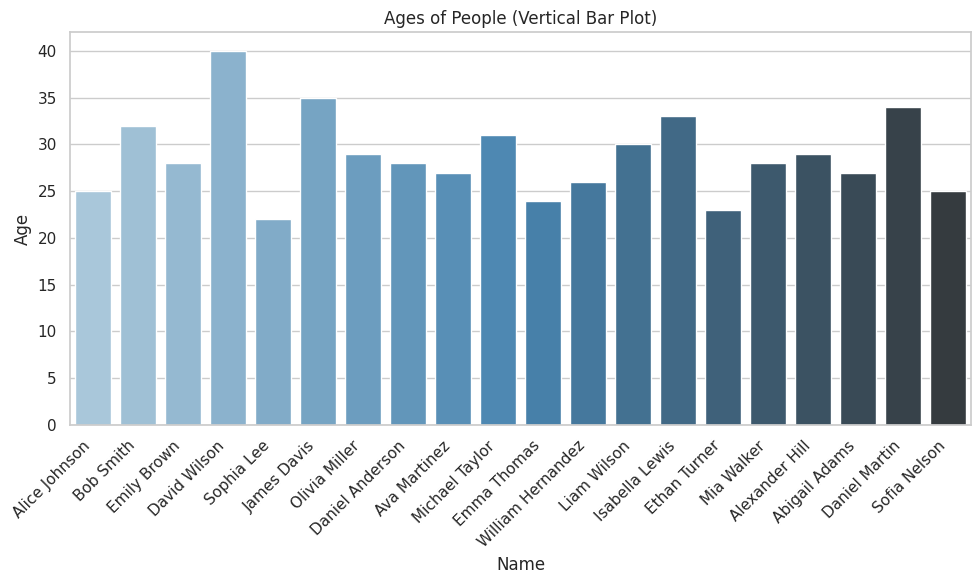

In [11]:
# Extrair nomes e idades
names = [item['name'] for item in data]
ages = [item['age'] for item in data]

# Definir estilo Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=names, y=ages, palette="Blues_d")

# Personalizar o gráfico
plt.xlabel('Name')
plt.ylabel('Age')
plt.title('Ages of People (Vertical Bar Plot)')
plt.xticks(rotation=45, ha="right")  # Rotaciona rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [ ]:
# Query with criteria: Find documents where age is greater than 30
query = {"age": {"$gt": 30}}
result = simulated_collection.find(query)
for doc in result:
    print(doc)

{'name': 'Bob Smith', 'age': 32, 'city': 'Chicago', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74b')}
{'name': 'David Wilson', 'age': 40, 'city': 'Houston', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74d')}
{'name': 'James Davis', 'age': 35, 'city': 'Boston', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74f')}
{'name': 'Michael Taylor', 'age': 31, 'city': 'Denver', '_id': ObjectId('64dbe2ba3c9edcf42ad4c753')}
{'name': 'Isabella Lewis', 'age': 33, 'city': 'Portland', '_id': ObjectId('64dbe2ba3c9edcf42ad4c757')}
{'name': 'Daniel Martin', 'age': 34, 'city': 'Orlando', '_id': ObjectId('64dbe2ba3c9edcf42ad4c75c')}


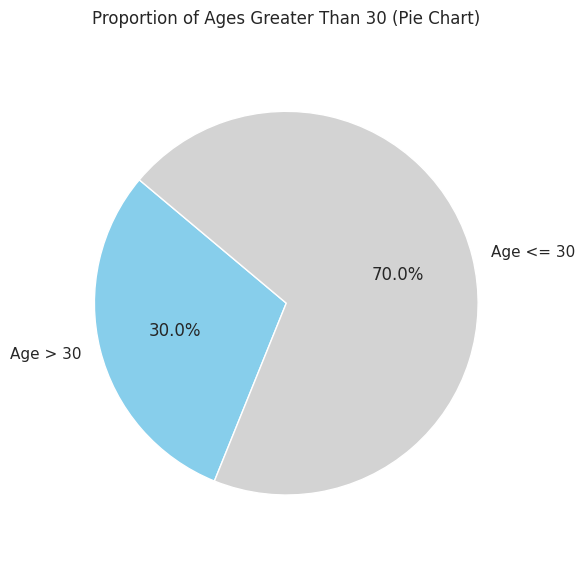

In [13]:
# Contagem de idades maiores que 30
count_greater_than_30 = sum(1 for item in data if item['age'] > 30)
count_less_than_or_equal_to_30 = len(data) - count_greater_than_30

# Rótulos e contagens
labels = ['Age > 30', 'Age <= 30']
counts = [count_greater_than_30, count_less_than_or_equal_to_30]

# Criar o gráfico de setores
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgray'])
plt.axis('equal')  # Assegura que o gráfico de setores seja um círculo

# Personalizar o gráfico
plt.title('Proportion of Ages Greater Than 30 (Pie Chart)')
plt.tight_layout()

# Mostrar gráfico
plt.show()

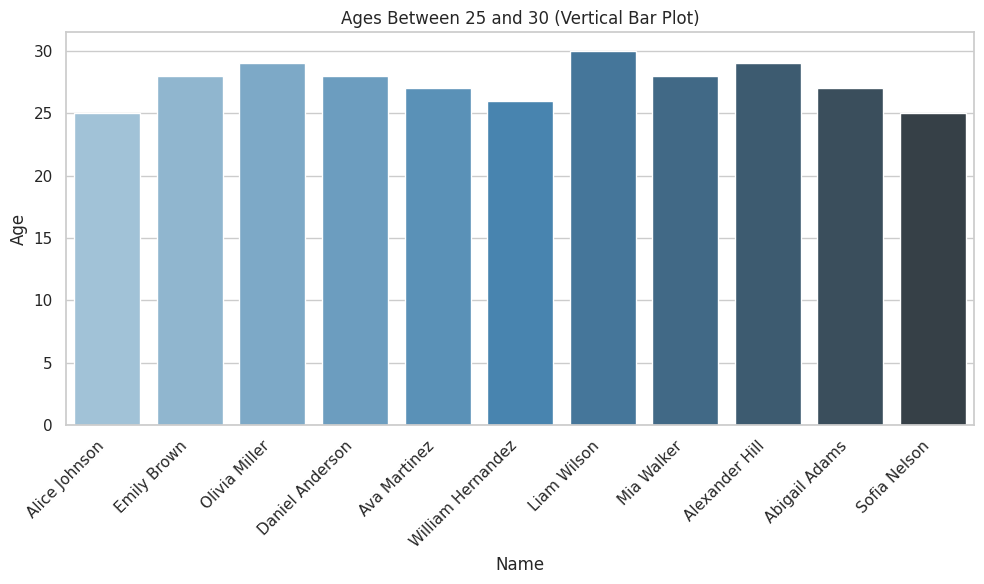

In [19]:
# Find documents where age is between 25 and 30
query = {"age": {"$gte": 25, "$lte": 30}}
result = simulated_collection.find(query)

# Armazenar os resultados da consulta em uma lista
data_25_30 = list(result)

# Definir estilo Seaborn
sns.set(style="whitegrid")

# Extrair nomes e idades
names = [item['name'] for item in data_25_30]
ages = [item['age'] for item in data_25_30]

# Criar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=names, y=ages, palette="Blues_d")

# Personalizar o gráfico
plt.xlabel('Name')
plt.ylabel('Age')
plt.title('Ages Between 25 and 30 (Vertical Bar Plot)')
plt.xticks(rotation=45, ha="right")  # Rotaciona rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Mostrar gráfico
plt.show()

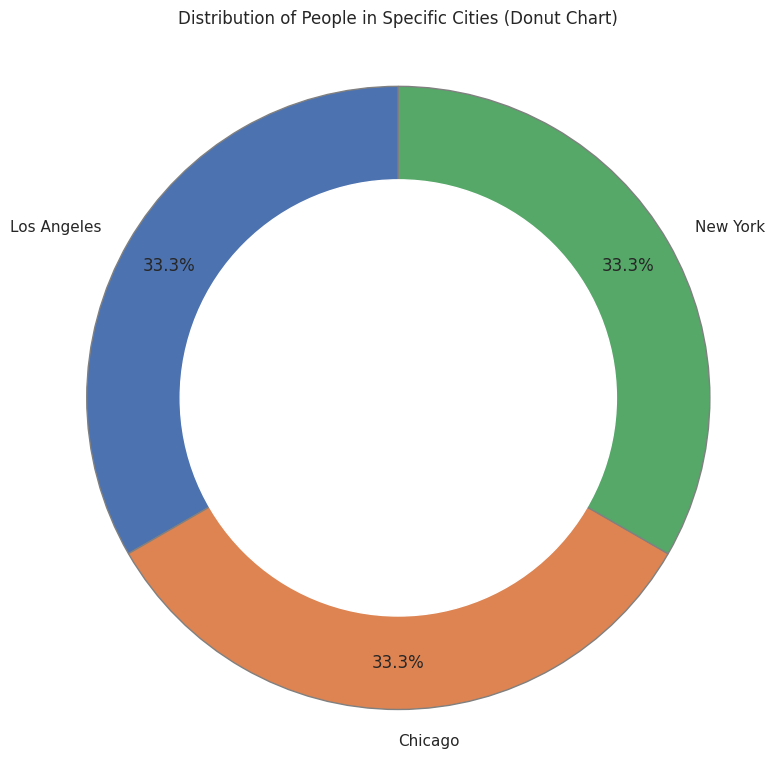

In [27]:
# Find documents in specific cities
cities_to_find = ["New York", "Los Angeles", "Chicago"]
query = {"city": {"$in": cities_to_find}}
result = simulated_collection.find(query)

# Converter o cursor em uma lista
data_cities = list(result)

# Contagem de pessoas por cidade
city_counts = {}
for doc in data_cities:
    city = doc['city']
    city_counts[city] = city_counts.get(city, 0) + 1

# Dados para o gráfico
cities = list(city_counts.keys())
counts = list(city_counts.values())

# Definir estilo Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de setores
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=cities, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'edgecolor': 'grey'})
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Adicionar um círculo no centro para criar um "donut chart"
plt.axis('equal')  # Mantém o aspecto circular do gráfico de setores
plt.title('Distribution of People in Specific Cities (Donut Chart)')
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [22]:
# Update multiple documents at once
query = {"age": {"$gt": 30}}
new_values = {"$set": {"status": "Senior"}}
updated_count = simulated_collection.update_many(query, new_values)
print(f"Updated {updated_count.modified_count} documents.")

Updated 6 documents.


In [ ]:
# Delete documents where age is less than 25
query = {"age": {"$lt": 25}}
deleted_count = simulated_collection.delete_many(query)
print(f"Deleted {deleted_count.deleted_count} documents.")

Deleted 3 documents.


In [ ]:
# Count the number of documents in the collection
doc_count = simulated_collection.count_documents({})
print("Total documents:", doc_count)

Total documents: 17


In [ ]:
# Find the youngest person
youngest_person = simulated_collection.find_one({}, sort=[("age", pymongo.ASCENDING)])
print("Youngest person:", youngest_person)

Youngest person: {'name': 'Alice Johnson', 'age': 25, 'city': 'Los Angeles', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74a')}


In [ ]:
# Find the oldest person in a specific city
oldest_person_city = "San Francisco"
query = {"city": oldest_person_city}
oldest_person = simulated_collection.find_one(query, sort=[("age", pymongo.DESCENDING)])
print(f"Oldest person in {oldest_person_city}:", oldest_person)

Oldest person in San Francisco: {'name': 'Emily Brown', 'age': 28, 'city': 'San Francisco', '_id': ObjectId('64dbe2ba3c9edcf42ad4c74c')}


In [ ]:
# Find the average age of all people
average_age_result = simulated_collection.aggregate([
    {"$group": {"_id": None, "average_age": {"$avg": "$age"}}}
])
average_age = list(average_age_result)[0]["average_age"]
print("Average age:", round(average_age, 2))

Average age: 29.82


Distinct cities: ['Atlanta', 'Austin', 'Boston', 'Chicago', 'Dallas', 'Denver', 'Detroit', 'Houston', 'Las Vegas', 'Los Angeles', 'Miami', 'Minneapolis', 'New York', 'Orlando', 'Philadelphia', 'Phoenix', 'Portland', 'San Diego', 'San Francisco', 'Seattle']


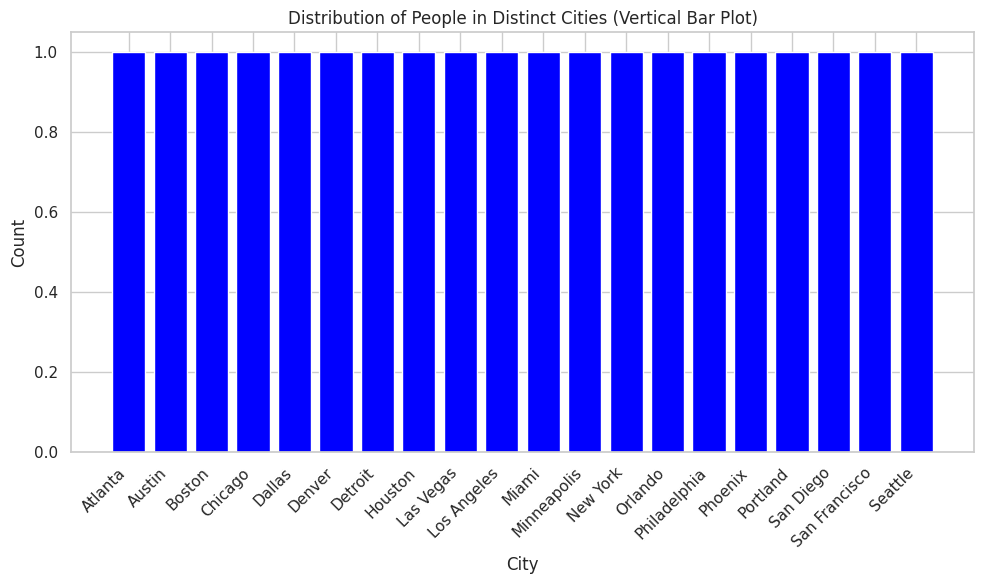

In [31]:
# Find the cities where people live, sorted alphabetically
distinct_cities = simulated_collection.distinct("city")
distinct_cities.sort()
print("Distinct cities:", distinct_cities)

# Contagem de pessoas por cidade
city_counts = {}
for city in distinct_cities:
    query = {"city": city}
    count = simulated_collection.count_documents(query)
    city_counts[city] = count

# Dados para o gráfico de barras verticais
cities = list(city_counts.keys())
counts = list(city_counts.values())

# Criar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
plt.bar(cities, counts, color='blue')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of People in Distinct Cities (Vertical Bar Plot)')
plt.xticks(rotation=45, ha="right")  # Rotaciona rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Mostrar gráfico
plt.show()